In [21]:
!pip install adversarial-robustness-toolbox

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [2]:
# img_path = 'red_panga.jpeg'
img_path = tf.keras.utils.get_file('Panda', origin= 'https://pbs.twimg.com/profile_images/829274786362699776/a1ttXfVG.jpg')

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

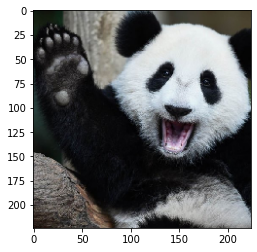

In [3]:
plt.imshow(img)

In [6]:
# model = VGG16(weights='imagenet', include_top=True, classifier_activation='softmax')
# preds = model.predict(x)
# print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02509815', 'lesser_panda', 0.99988925), ('n02443114', 'polecat', 9.040174e-05), ('n02443484', 'black-footed_ferret', 4.9705077e-06)]


In [4]:
model = VGG16(weights='imagenet', include_top=True, classifier_activation='softmax')

In [5]:
def train_step(model, images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

classifier = TensorFlowV2Classifier(
    model=model,
    loss_object=loss_object,
    train_step=train_step,
    nb_classes=1000,
    input_shape=(224, 224, 3),
    clip_values=(0, 255),
)

In [6]:
preds = classifier.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02510455', 'giant_panda', 0.99884963), ('n04399382', 'teddy', 0.00094351755), ('n02500267', 'indri', 9.434982e-05)]


In [16]:
attack = FastGradientMethod(estimator=classifier, eps=2)
x_test_adv = attack.generate(x=x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4870: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


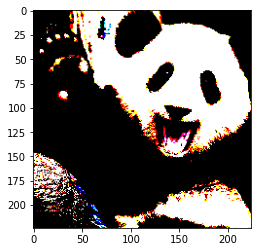

In [17]:
plt.imshow(x_test_adv[0])

In [18]:
predictions = classifier.predict(x_test_adv)
print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n04399382', 'teddy', 0.593237), ('n02510455', 'giant_panda', 0.26898292), ('n02500267', 'indri', 0.037710212)]
